In [1]:
#Code to calculate the Bimodality index and to plot it. Overlayed with consistency scale values as the opaqcity effect. 
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches

In [2]:
# Reading the datasets with consistency scale values for each algorithm and IVT
#Can only be generated after running NCS1.py,NCS2.py
CB = np.load('CBcsv.npy')
CN = np.load('CNcsv.npy')
GW = np.load('GWcsv.npy')
Reid = np.load('RDcsv.npy')
MD = np.load('MDcsv.npy')
IVT=np.load('IVTcsv.npy')

In [3]:
#Reading all algorithms x,y values
CB_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/CBx.npy")
CB_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/CBy.npy")

CN_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/CNx.npy")
CN_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/CNy.npy")

GW_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/GWx.npy")
GW_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/GWy.npy")

RD_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/RDx.npy")
RD_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/RDy.npy")

MD_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/MDx.npy")
MD_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/MDy.npy")

IVT_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/IVTx.npy")
IVT_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/IVTy.npy")

In [4]:
import numpy as np

def compute_std_dev_difference(CN_x, CN_y):
    """
    Computes the difference between the standard deviations of CN_x and CN_y along the time axis.

    Parameters:
    CN_x (numpy array): Array of x-components with shape (time, lat, lon).
    CN_y (numpy array): Array of y-components with shape (time, lat, lon).

    Returns:
    numpy array: The difference between std_dev_x and std_dev_y.
    float: The maximum absolute value of the difference.
    """
    std_dev_x = np.std(CN_x, axis=0)
    std_dev_y = np.std(CN_y, axis=0)
    std_dev_difference = std_dev_x - std_dev_y
    #max_std_dev_difference = np.nanmax(std_dev_difference)

    return std_dev_difference


std_dev_CB = compute_std_dev_difference(CB_x, CB_y)
std_dev_CN = compute_std_dev_difference(CN_x, CN_y)
std_dev_GW = compute_std_dev_difference(GW_x, GW_y)
std_dev_RD = compute_std_dev_difference(RD_x, RD_y)
std_dev_MD = compute_std_dev_difference(MD_x, MD_y)
std_dev_IVT= compute_std_dev_difference(IVT_x, IVT_y)


In [5]:

# Assuming your data is stored in a variable `data` with shape (36, 361, 576)
std_dev_x = np.std(CN_x, axis=0)
print(std_dev_x)
std_dev_y = np.std(CN_y, axis=0)
std_dev=std_dev_x-std_dev_y
print(np.nanmax(std_dev))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
1.0


In [6]:
# Replace NaN values with 1 in the std_dev data
CB = np.nan_to_num(CB, nan=1)
CN = np.nan_to_num(CN, nan=1)
GW = np.nan_to_num(GW, nan=1)
MD = np.nan_to_num(MD, nan=1)
RD = np.nan_to_num(Reid, nan=1)
IVT = np.nan_to_num(IVT, nan=1)


In [7]:
# Store all datasets in a list
std_dev_datasets = [std_dev_GW, std_dev_MD, std_dev_RD, std_dev_CB, std_dev_CN, std_dev_IVT]
titles = ["(a) Guan and Waliser", "(b) Mundhenk", "(c) Reid et al.",
         "(d) TECA-BARD v1.0.1", "(e) ClimateNet", "(f) IVT"]
csv=[GW,MD,RD,CB,CN,IVT]

0
(361,)
1
(361,)
2
(361,)
3
(361,)
4
(361,)
5
(361,)


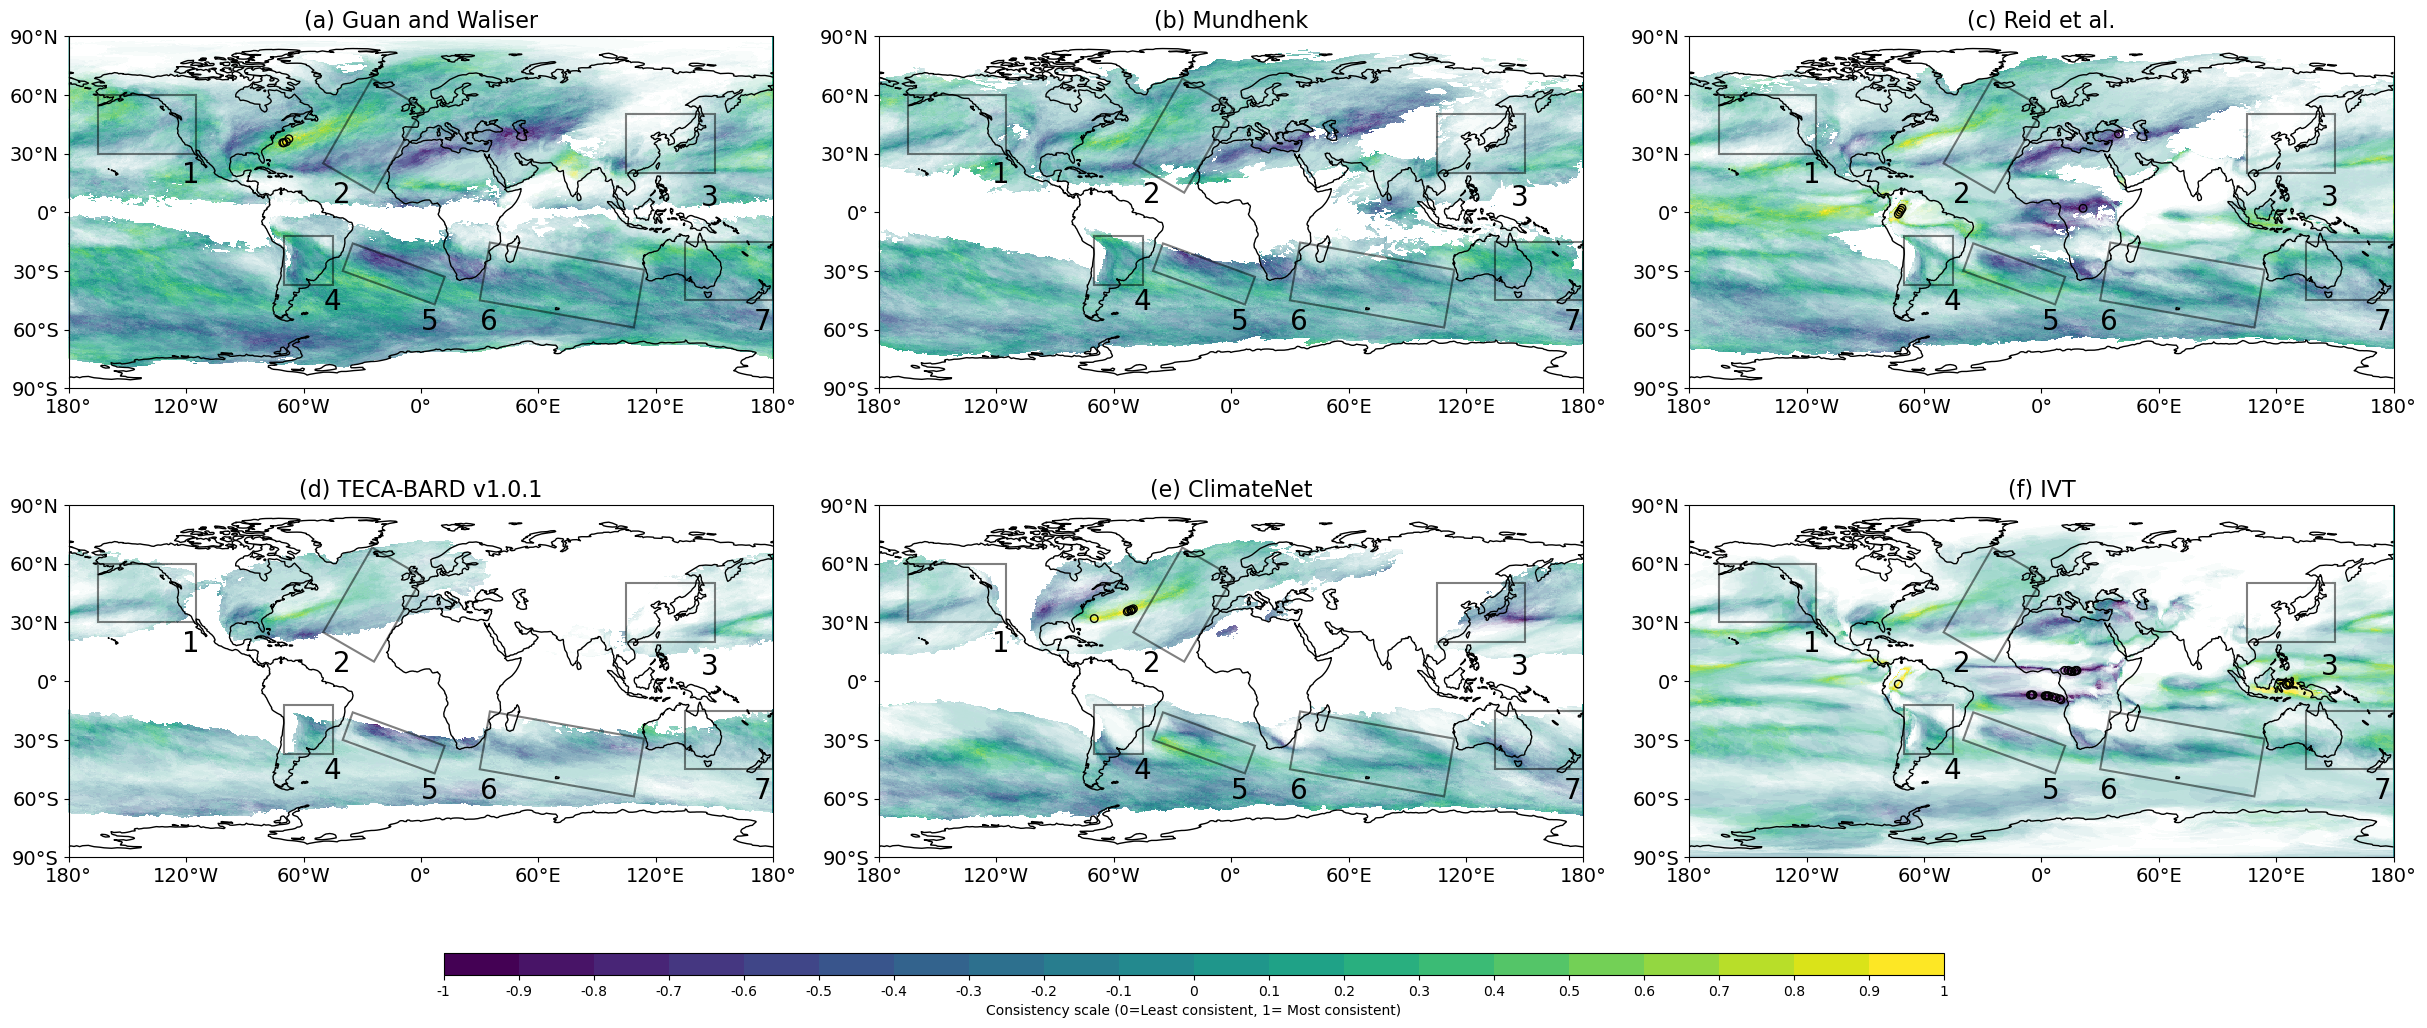

In [8]:
#6 color bar plots
from matplotlib.colors import BoundaryNorm, ListedColormap
lat=np.load('lat.npy')
lon=np.load('lon.npy')

# Define the boundaries for the color scale (-1 to 1)
boundaries = np.linspace(-1, 1, 21)
norm = BoundaryNorm(boundaries, ncolors=256)

#print(normalized_AR_freq.values)
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(25,11),constrained_layout=False)


# Create a ListedColormap from these colors
#cmap = ListedColormap(colors)
# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
for i in range(0,6):

        data=std_dev_datasets[i]
        print(i)
        print(lat.shape)
        
        indices = np.where((data == 1) | (data == -1))

        # Extract corresponding latitudes and longitudes
        lat_points = lat[indices[0]]
        lon_points = lon[indices[1]]
       
        # Use pcolormesh for large data
        cs = axs[i].pcolormesh(lon, lat, data, 
                                transform=ccrs.PlateCarree(),
                                cmap='viridis' ,
                                norm=norm,
                                shading='auto')

         # Apply 2D alpha transparency
        cs.set_alpha(1-csv[i])

         #Scatter all points where std_dev_GW == 1
        axs[i].scatter(lon_points, lat_points, color='none', marker='o', s=30, edgecolor='black', label='std_dev_GW = 1')
        
        # Title each subplot with the name of the model
        axs[i].set_title(titles[i],fontsize=16)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        # Increase font size of tick labels
        axs[i].tick_params(axis='x', labelsize=14) 

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        # Increase font size of tick labels
        axs[i].tick_params(axis='y', labelsize=14) 
        
        #Adding patches
        axs[i].add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    #label='1',
                                    transform=ccrs.PlateCarree())
                 )
                 #-100,45
        axs[i].annotate("1",(-122,15),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='Black',
                                    angle=-30,
                                    transform=ccrs.PlateCarree())
                 )
                 #-25,55
        axs[i].annotate("2",(-45,5),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,  # Shifted right, slightly reduced width
                                alpha=0.5,
                                lw=1.5,  
                                facecolor='None',
                                edgecolor='black',  
                                angle=0,  
                                transform=ccrs.PlateCarree())
                )
        axs[i].annotate("3",(143,3.5),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
        #xy=[-85, -63], width=30, height=50
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #-80,-61
        axs[i].annotate("4",(-50,-50),color='black',fontsize=20)
        #-96,-61     
        axs[i].add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    angle=-10,
                                    transform=ccrs.PlateCarree())
                 )
                 #35,-40
        axs[i].annotate("6",(30,-60),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
        #xy=[140, -45], width=30, height=30
                                    alpha=0.5,
                                    lw=1.5,
                                    angle=-20,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #157,-42
        axs[i].annotate("5",(0,-60),color='black',fontsize=20)

        axs[i].add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                alpha=0.5,
                                lw=1.5,  # Reduce thickness to 1
                                angle=0,  # Remove rotation
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )

        axs[i].annotate("7", (170, -60), color='black', fontsize=20)  # Shift annotation to the right



#fig.delaxes(axs[5])

fig.subplots_adjust(bottom=0.10, top=1.0, left=0.05, right=0.98,
                    wspace=0.15, hspace=-0.1)
#fig.subplots_adjust(bottom=1, top=0.9, left=0.1, right=0.80,
                    #wspace=0.15, hspace=0)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar_ax = fig.add_axes([0.2, 0.07, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',boundaries = boundaries,norm=norm) 
cbar.set_label('Consistency scale (0=Least consistent, 1= Most consistent)')
cbar_ticks = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)', 'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
#cbar_ticks = [0, 0.2, 0.4, 0.6, 0.8]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)',
#                    'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)
#plt.tight_layout()
plt.savefig("Bimodal.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [9]:
# Find indices where std_dev_GW is exactly 1
indices = np.where(std_dev_GW == 1)

# Extract corresponding latitude and longitude values
lat_values = lat[indices[0]]
lon_values = lon[indices[1]]

# Print the locations
for i in range(len(lat_values)):
    print(f"Latitude: {lat_values[i]}, Longitude: {lon_values[i]}")

timeseries_GW_x=GW_x[:,indices[0],indices[1]]
timeseries_GW_y=GW_y[:,indices[0],indices[1]]
print(timeseries_GW_x.shape)


Latitude: 35.5, Longitude: -70.625
Latitude: 35.5, Longitude: -70.0
Latitude: 36.0, Longitude: -68.75
Latitude: 37.5, Longitude: -67.5
(36, 4)


In [10]:
import numpy as np

def assign_season(x, y):
    """
    This function assigns a season label based on the (x, y) coordinates:
    - (1, 0) -> 'DJF' (December-January-February)
    - (0, -1) -> 'SON' (September-October-November)
    - (-1, 0) -> 'JJA' (June-July-August)
    - (0, 1) -> 'MAM' (March-April-May)
    
    Args:
        x: A 2D numpy array of shape (time, x) representing the x-coordinates.
        y: A 2D numpy array of shape (time, y) representing the y-coordinates.
        
    Returns:
        A 2D numpy array of season labels with shape (time, x).
    """
    # Initialize an empty array to store the season labels
    seasons = np.empty_like(x, dtype=object)

    # Iterate over the time and x-coordinate dimensions
    for t in range(x.shape[0]):
        for i in range(x.shape[1]):
            if x[t, i] == 1 and y[t, i] == 0:
                seasons[t, i] = 1
            elif x[t, i] == 0 and y[t, i] == -1:
                seasons[t, i] = 2
            elif x[t, i] == -1 and y[t, i] == 0:
                seasons[t, i] = 3
            elif x[t, i] == 0 and y[t, i] == 1:
                seasons[t, i] = 4

    return seasons


# Call the function with x and y arrays
seasons = assign_season(timeseries_GW_x, timeseries_GW_y)
print(seasons[:,3])


[3 1 3 1 1 1 3 1 1 1 1 3 1 1 1 1 3 3 3 3 3 1 3 3 1 1 3 1 3 3 3 3 3 1 3 1]


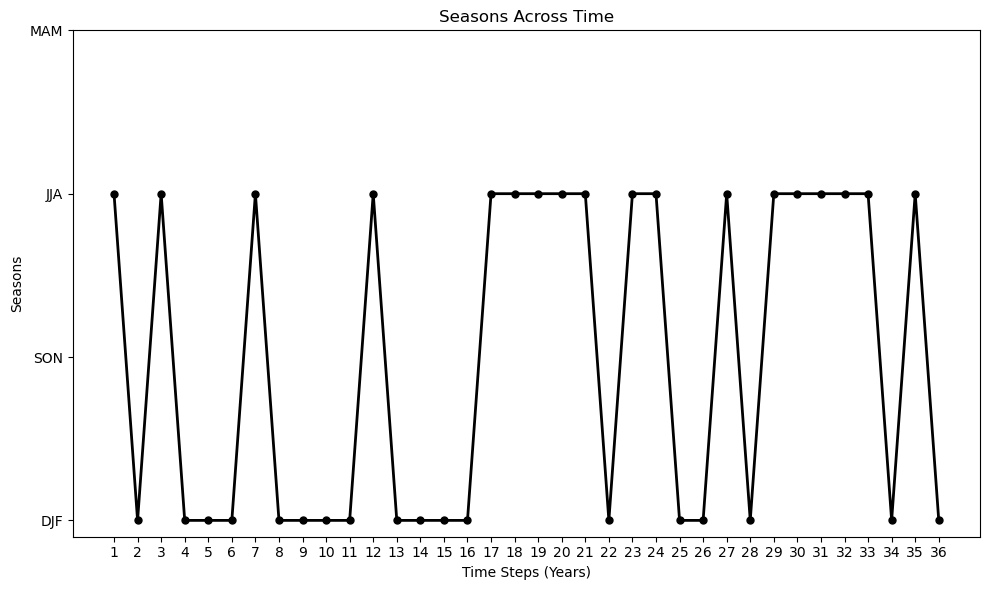

In [11]:
# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the lines connecting the points
ax.plot(range(1,37,1), seasons[:, 3], color='black', marker='o', markersize=5, label="MAM", linestyle='-', linewidth=2)

# Plot the time series with seasons on the y-axis and time steps on the x-axis
#ax.scatter(range(36), seasons[:,3], cmap='viridis', s=100, edgecolor='black')

# Customize the plot
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['DJF', 'SON', 'JJA', 'MAM'])
ax.set_xticks(range(1,37,1))
ax.set_xlabel('Time Steps (Years)')
ax.set_ylabel('Seasons')
ax.set_title('Seasons Across Time')

# Display the plot
plt.tight_layout()
plt.show()